In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
given_data = pd.read_csv('CO2 Emissions_Canada.csv')


***Reading Data in sheet***

In [5]:
given_data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
given_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [22]:
given_data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [7]:
data = given_data.loc[:,['Engine Size(L)','CO2 Emissions(g/km)']]
data = data.rename(columns={'Engine Size(L)':'Engine_size','CO2 Emissions(g/km)': 'CO2_emisson'})

In [8]:
data.head()

,Engine_size,CO2_emisson
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


***Data Visualization***

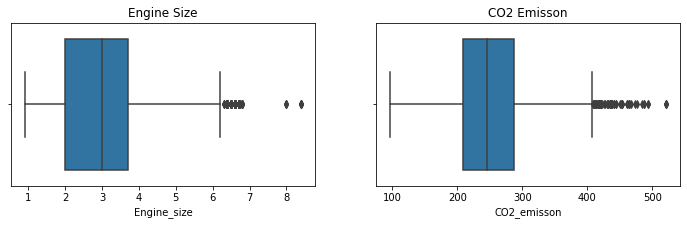

In [9]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.boxplot(data.Engine_size)
plt.title("Engine Size")
plt.subplot(1,2,2)
sns.boxplot(data.CO2_emisson)
plt.title('CO2 Emisson')
plt.show()

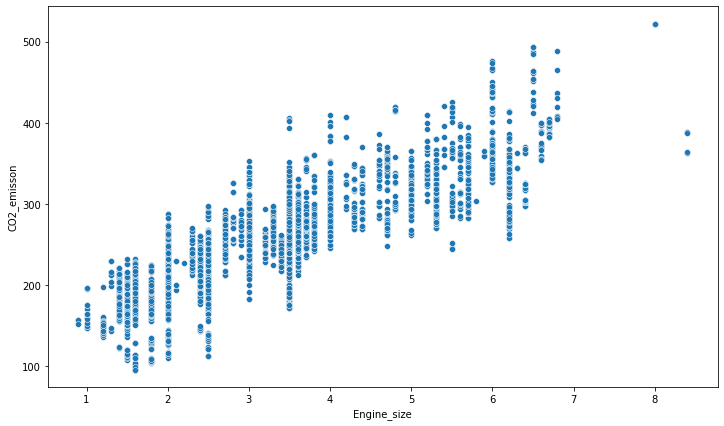

In [10]:
plt.figure(figsize=(12,7))
sns.scatterplot(data.Engine_size,data.CO2_emisson)

In [11]:
data.corr()

,Engine_size,CO2_emisson
Engine_size,1.000000,0.851145
CO2_emisson,0.851145,1.000000


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

***Training and Testing Set***

In [13]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
print(f'x:{x.shape}')
print(f'y:{y.shape}')

x:(7385, 1)
y:(7385,)


In [14]:
X_train, X_test,Y_train,Y_test =train_test_split(x,y,test_size=0.1,random_state=54)

In [15]:
col=['X_train','X_test','Y_train','Y_test']
test=[X_train, X_test,Y_train,Y_test]
for i in range(len(col)):
  print(f'{col[i]}: {test[i].shape}')

X_train: (6646, 1)
X_test: (739, 1)
Y_train: (6646,)
Y_test: (739,)


***Plotting Distribution of Training and Testing Dataset***

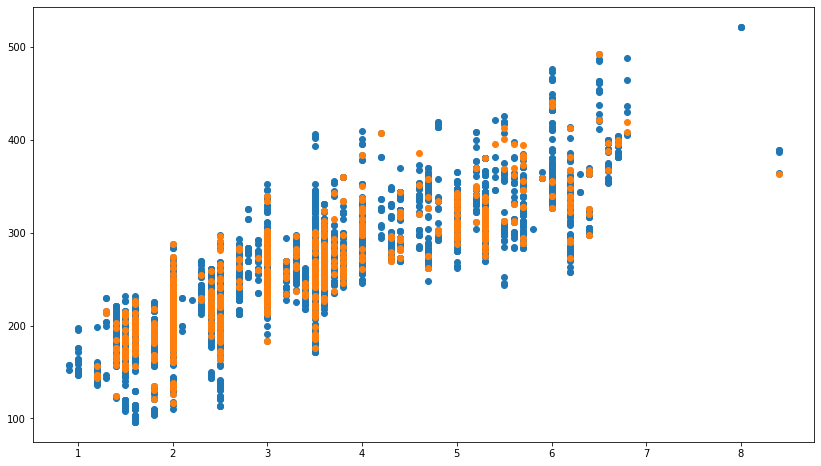

In [16]:
plt.figure(figsize=(14,8))
plt.scatter(X_train,Y_train)
plt.scatter(X_test,Y_test)



***Moddeling and Fitting***

In [17]:
regr =LinearRegression()
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(f'Coefficient:{regr.coef_[0]}')
print(f'Intercept:{regr.intercept_}')

Coefficient:36.68943858038826
Intercept:134.70240291751702


***Regression Line***

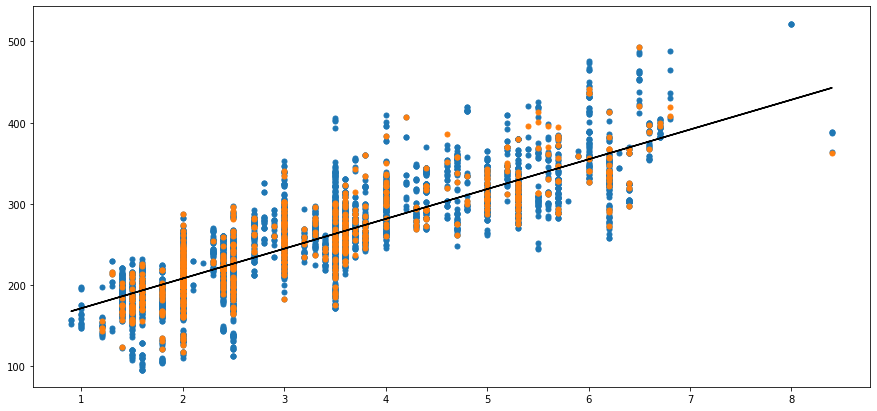

In [19]:
plt.figure(figsize=(15,7))
plt.scatter(X_train,Y_train, s=25)
plt.scatter(X_test,Y_test, s=25)
plt.plot(x, regr.coef_*x +regr.intercept_,'-k',label='Regression Line')
plt.show()

***Making Prediction***

In [20]:
y_pred =regr.predict(X_test).astype(int)
pred=pd.DataFrame({'Engine_size':X_test[:,0],'Actual CO2':Y_test,'Prediction CO2':y_pred})
pred.head()

,Engine_size,Actual CO2,Prediction CO2
0,2.0,232,208
1,1.6,191,193
2,3.2,234,252
3,4.4,344,296
4,5.0,306,318


In [23]:
print(f'Engine Size: 9.4 L\nCO2 Emisson:{int(regr.predict([[9.4]])[0])} gm/km')

Engine Size: 9.4 L
CO2 Emisson:479 gm/km
